# Vyhodnotenie výkonových dopadov

## Úvod

V rámci diplomovej práce sme vytvorili sadu CLI skriptov umožňujúcich používateľovi aplikovať a deaplikovať vybrané skupiny pravidiel na základe rôznych atribútov pravidla a jeho hodnoty. Následne sme otestovali použitie nástroja na redukciu použitej detekčnej sady formou deaktivácie pravidiel, ktoré sme nepovažovali za relevantné pre testovanú infraštruktúru z hľadiska bezpečnostnej závažnosti upozornení vygenerovanými pravidlom alebo z hľadiska jeho relevantnosti vzhľadom na typy zariadení a použité technológie v chránenej infraštruktúre. 

Celkovo sa nám použitím vytvorenej sady CLI skriptov podarilo zredukovať detekčnú sadu o __5 957__ z pôvodných __30 793__ pravidiel na __24 836__ pravidiel, čo predstavuje redukciu použitej detekčnej sady o takmer __20%__ pravidiel. Pričom ako sme ukázali v sady rámci experimentov zameranej na otestovanie dopadov redukcie detekčnej sady na množstvo a charakter vygenerovaných upozornení táto redukcia nemala žiadne negatívne dopady na schopnosť bezpečnostných analytikov vyhodnocujúcich vygenerované upozornenia identifikovať škodlivú sieťovú premávku v sieti. 

V rámci tejto sady experimentov sme sa teda zamerali na vyhodnotenie dopadov redukcie použitej detekčnej sady pravidiel na redukciu potrebných výpočtových zdrojov systémom IDS. 

### Vykonané experimenty

Rovnako ako v prípade testovania dopadov redukcie detekčnej sady aj v tomto prípade sme vykonali testovanie v rámci navrhnutej a implementovanej testovacej ifraštruktúry s použitím pôvodného datasetu. Experiment bol vykonaný s nasledovnými parametrami:

- Rýchlosť prehrávanie dát: 100 mbps
- Nastavenie __N__ (počet analyzovaných paketov z každého toku): 100
- Počet opakovaní experimentu: 10 X

Na monitorovanie výpočtových požiadaviek systému IDS počas testovania sme použili nástroj Psrecord. Výstupu z tohto programu vo formáte txt boli predmetom výkonovej analýzi. Aby sme dosiahli istú mieru ustálenosti výsledkov meranie pre každý testovací scenár (Pondelok až Piatok) sme zopakovali 10 X pre oba testovacie prípady teda pôvodná aj redukovaná sada pravidiel. V rámci analýzi pre jednotlivé testovacie scenáre vyhodnocujeme teda výsledne kumulatívne ako súhrný záznam z jednotlivých testovaní. 

V nasledujúcej časti porovnávame využitie výpočtových prostriedkov systémom IDS počas jednotlivých 5 testovacích scenárov (scenár Pondelok až Piatok) pri použití pôvodnej detekčnej (*df_original_disable*) sady a redukovanej detekčnej sady (*df_modified_disable*).

### Porovnanie dopadov redukcie dátovej sady

Ako možno vidieť na grafoch redukciou aplikovanej sady pravidiel sa nám podarilo zredukovať výpočtový výkon vzužívaný systémom IDS o približne 3,2%. V nasledujúcich grafoch analyzujeme k akej redukcii požiadaviek na výpočtový výkon došlo pri jednotlivých testovacích scenároch. Pričom ako hodnotu výkonu CPU pre jednotlivé scenáre sme použili priemerný výkon CPU získaný na základe 10 opakovaní experimentu pre daný scenár. Pričom sme sa pri porovnaní zamerali najmä na spotrebu CPU nakoľko spotreba RAM bola konštantná počas jednotlivých experimentov a závisela výlučne od počtu aplikovaných pravidiel. Teda aj redukcia pamäte RAM bola v tomto prípade konštantná. 


In [91]:
# spotreba CPU [Pondelok, Utorok, Streda....]
CPU_original = [23.128, 19.315, 12.123, 17.964, 22.801]
RAM_original = 2111
RAM_Virtual_original = 2976
rules_original = 30793

# spotreba CPU [Pondelok, Utorok, Streda....]
CPU_reduced = [22.092, 18.775, 11.646, 17.276, 22.491]
RAM_reduced  = 2061
RAM_Virtual_reduced  = 2930
rules_reduced =  24836


### Redukcia výkonu CPU scenár Pondelok
Graf zobrazuje ako sa znížili požiadavky na výpočtový výkon CPU po redukcii detekčnej sady pravidiel v rámci pondelkového scenáru.

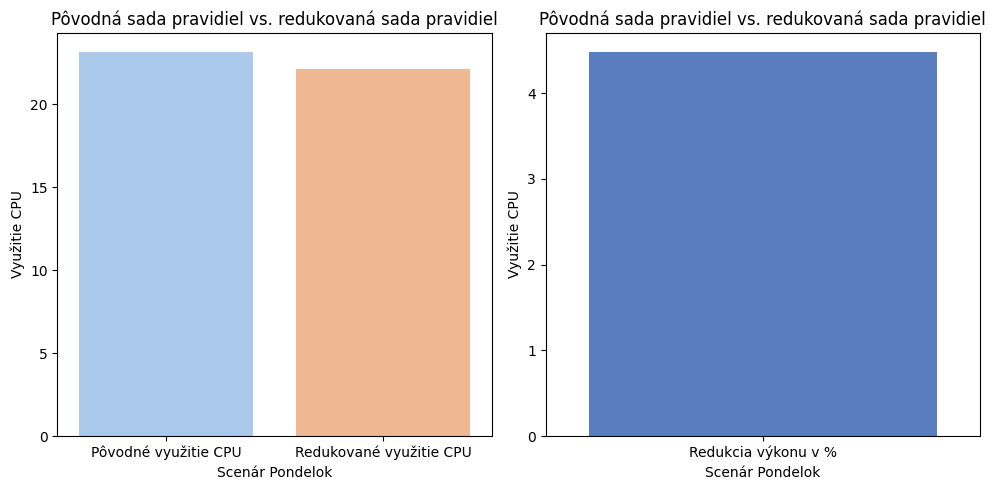

Redukcia vo využití CPU (absolútna), Scenár Pondelok: 1.036%
Redukcia vo využití CPU (relatívna), Scenár Pondelok: 4.479%


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Example data
baseline = CPU_original[0]
reduced = CPU_reduced[0]

# Calculate absolute and percentual reduction
absolute_reduction = baseline - reduced
percentual_reduction = (absolute_reduction / baseline) * 100

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the baseline and reduced values
sns.barplot(x=["Pôvodné využitie CPU", "Redukované využitie CPU"], y=[baseline, reduced], ax=ax[0], palette="pastel")
ax[0].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[0].set_ylabel("Využitie CPU")
ax[0].set_xlabel("Scenár Pondelok")

# Plot the percentual reduction
sns.barplot(x=["Redukcia výkonu v %"], y=[percentual_reduction], ax=ax[1], palette="muted")
ax[1].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[1].set_ylabel("Využitie CPU")
ax[1].set_xlabel("Scenár Pondelok")

# Show the plots
plt.tight_layout()
plt.show()

# Display the calculated values
print("Redukcia vo využití CPU (absolútna), Scenár Pondelok: {:.3f}%".format(absolute_reduction))
print("Redukcia vo využití CPU (relatívna), Scenár Pondelok: {:.3f}%".format(percentual_reduction))


### Redukcia výkonu CPU scenár Utorok
Graf zobrazuje ako sa znížili požiadavky na výpočtový výkon CPU po redukcii detekčnej sady pravidiel v rámci utorkového scenáru.

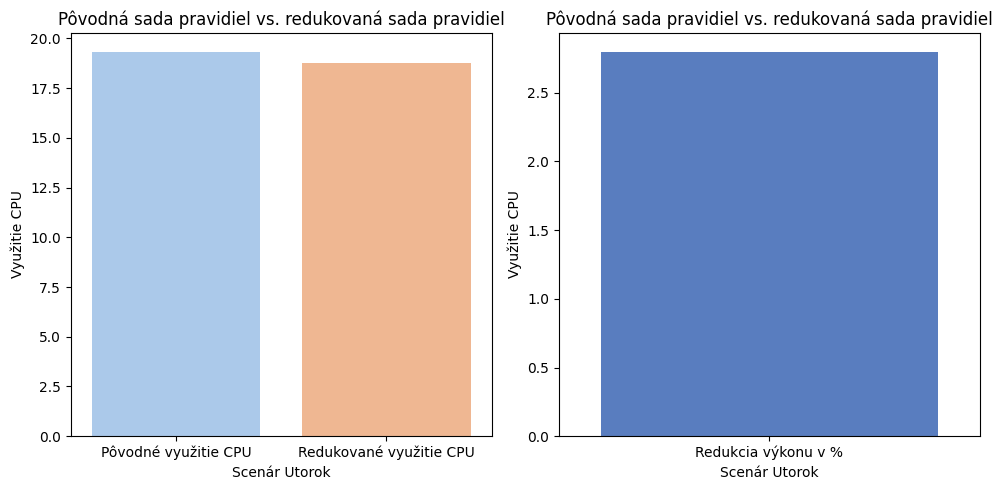

Redukcia vo využití CPU (absolútna), Scenár Utorok: 0.540%
Redukcia vo využití CPU (relatívna), Scenár Utorok: 2.796%


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Example data
baseline = CPU_original[1]
reduced = CPU_reduced[1]

# Calculate absolute and percentual reduction
absolute_reduction = baseline - reduced
percentual_reduction = (absolute_reduction / baseline) * 100

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the baseline and reduced values
sns.barplot(x=["Pôvodné využitie CPU", "Redukované využitie CPU"], y=[baseline, reduced], ax=ax[0], palette="pastel")
ax[0].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[0].set_ylabel("Využitie CPU")
ax[0].set_xlabel("Scenár Utorok")

# Plot the percentual reduction
sns.barplot(x=["Redukcia výkonu v %"], y=[percentual_reduction], ax=ax[1], palette="muted")
ax[1].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[1].set_ylabel("Využitie CPU")
ax[1].set_xlabel("Scenár Utorok")

# Show the plots
plt.tight_layout()
plt.show()

# Display the calculated values
print("Redukcia vo využití CPU (absolútna), Scenár Utorok: {:.3f}%".format(absolute_reduction))
print("Redukcia vo využití CPU (relatívna), Scenár Utorok: {:.3f}%".format(percentual_reduction))



### Redukcia výkonu CPU scenár Streda
Graf zobrazuje ako sa znížili požiadavky na výpočtový výkon CPU po redukcii detekčnej sady pravidiel v rámci stredajšieho scenáru.

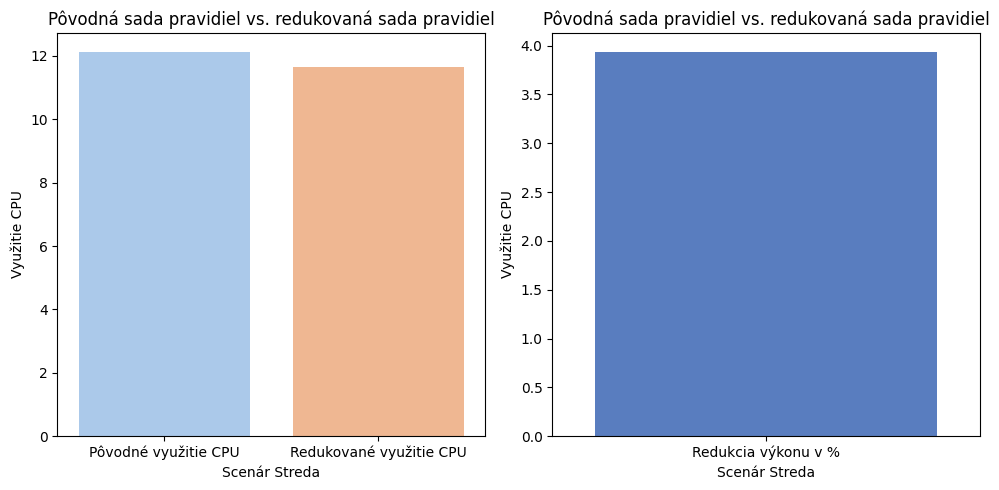

Redukcia vo využití CPU (absolútna), Scenár Streda: 0.477%
Redukcia vo využití CPU (relatívna), Scenár Streda: 3.935%


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Example data
baseline = CPU_original[2]
reduced = CPU_reduced[2]

# Calculate absolute and percentual reduction
absolute_reduction = baseline - reduced
percentual_reduction = (absolute_reduction / baseline) * 100

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the baseline and reduced values
sns.barplot(x=["Pôvodné využitie CPU", "Redukované využitie CPU"], y=[baseline, reduced], ax=ax[0], palette="pastel")
ax[0].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[0].set_ylabel("Využitie CPU")
ax[0].set_xlabel("Scenár Streda")

# Plot the percentual reduction
sns.barplot(x=["Redukcia výkonu v %"], y=[percentual_reduction], ax=ax[1], palette="muted")
ax[1].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[1].set_ylabel("Využitie CPU")
ax[1].set_xlabel("Scenár Streda")

# Show the plots
plt.tight_layout()
plt.show()

# Display the calculated values
print("Redukcia vo využití CPU (absolútna), Scenár Streda: {:.3f}%".format(absolute_reduction))
print("Redukcia vo využití CPU (relatívna), Scenár Streda: {:.3f}%".format(percentual_reduction))



### Redukcia výkonu CPU scenár Štvrtok
Graf zobrazuje ako sa znížili požiadavky na výpočtový výkon CPU po redukcii detekčnej sady pravidiel v rámci štvrtkového scenáru.

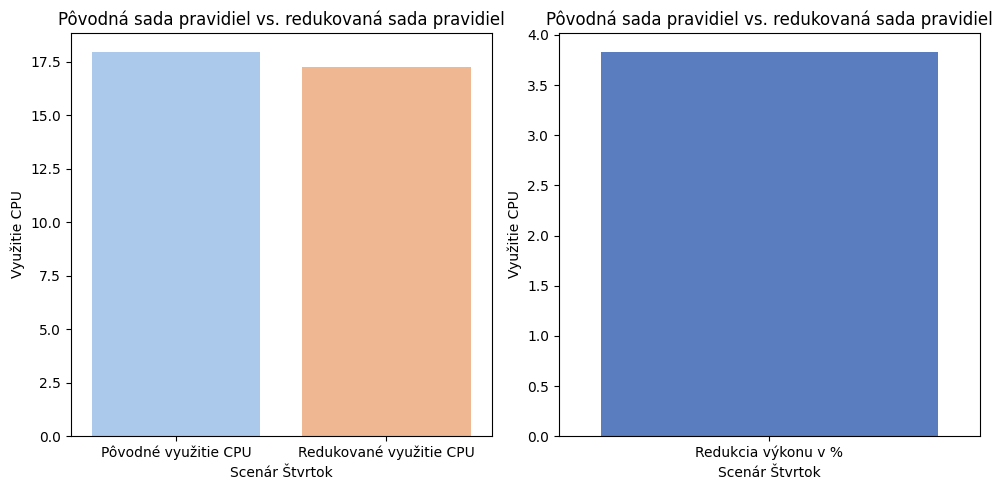

Redukcia vo využití CPU (absolútna), Scenár Štvrtok: 0.688%
Redukcia vo využití CPU (relatívna), Scenár Štvrtok: 3.830%


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Example data
baseline = CPU_original[3]
reduced = CPU_reduced[3]

# Calculate absolute and percentual reduction
absolute_reduction = baseline - reduced
percentual_reduction = (absolute_reduction / baseline) * 100

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the baseline and reduced values
sns.barplot(x=["Pôvodné využitie CPU", "Redukované využitie CPU"], y=[baseline, reduced], ax=ax[0], palette="pastel")
ax[0].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[0].set_ylabel("Využitie CPU")
ax[0].set_xlabel("Scenár Štvrtok")

# Plot the percentual reduction
sns.barplot(x=["Redukcia výkonu v %"], y=[percentual_reduction], ax=ax[1], palette="muted")
ax[1].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[1].set_ylabel("Využitie CPU")
ax[1].set_xlabel("Scenár Štvrtok")

# Show the plots
plt.tight_layout()
plt.show()

# Display the calculated values
print("Redukcia vo využití CPU (absolútna), Scenár Štvrtok: {:.3f}%".format(absolute_reduction))
print("Redukcia vo využití CPU (relatívna), Scenár Štvrtok: {:.3f}%".format(percentual_reduction))



### Redukcia výkonu CPU scenár Piatok
Graf zobrazuje ako sa znížili požiadavky na výpočtový výkon CPU po redukcii detekčnej sady pravidiel v rámci piatkového scenáru.

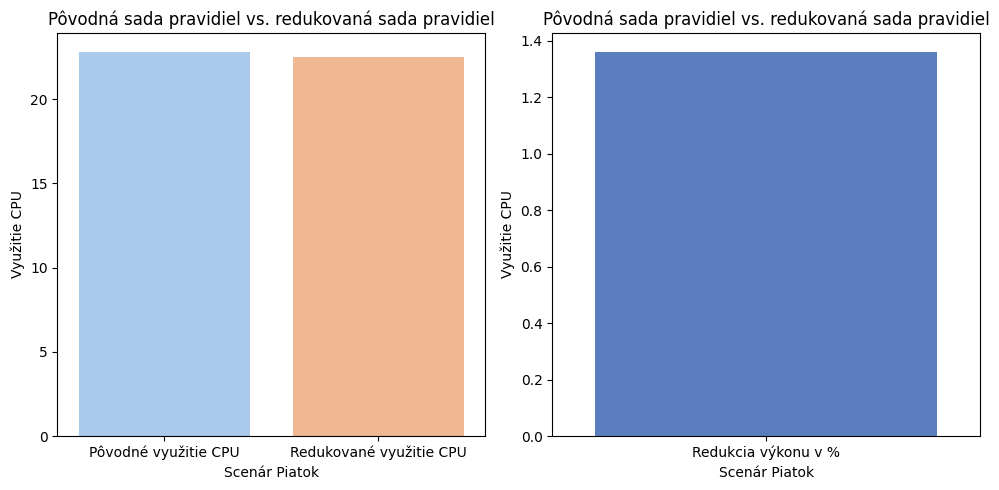

Redukcia vo využití CPU (absolútna), Scenár Piatok: 0.310%
Redukcia vo využití CPU (relatívna), Scenár Piatok: 1.360%


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

baseline = CPU_original[4]
reduced = CPU_reduced[4]

# Calculate absolute and percentual reduction
absolute_reduction = baseline - reduced
percentual_reduction = (absolute_reduction / baseline) * 100

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the baseline and reduced values
sns.barplot(x=["Pôvodné využitie CPU", "Redukované využitie CPU"], y=[baseline, reduced], ax=ax[0], palette="pastel")
ax[0].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[0].set_ylabel("Využitie CPU")
ax[0].set_xlabel("Scenár Piatok")

# Plot the percentual reduction
sns.barplot(x=["Redukcia výkonu v %"], y=[percentual_reduction], ax=ax[1], palette="muted")
ax[1].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[1].set_ylabel("Využitie CPU")
ax[1].set_xlabel("Scenár Piatok")

# Show the plots
plt.tight_layout()
plt.show()

# Display the calculated values
print("Redukcia vo využití CPU (absolútna), Scenár Piatok: {:.3f}%".format(absolute_reduction))
print("Redukcia vo využití CPU (relatívna), Scenár Piatok: {:.3f}%".format(percentual_reduction))


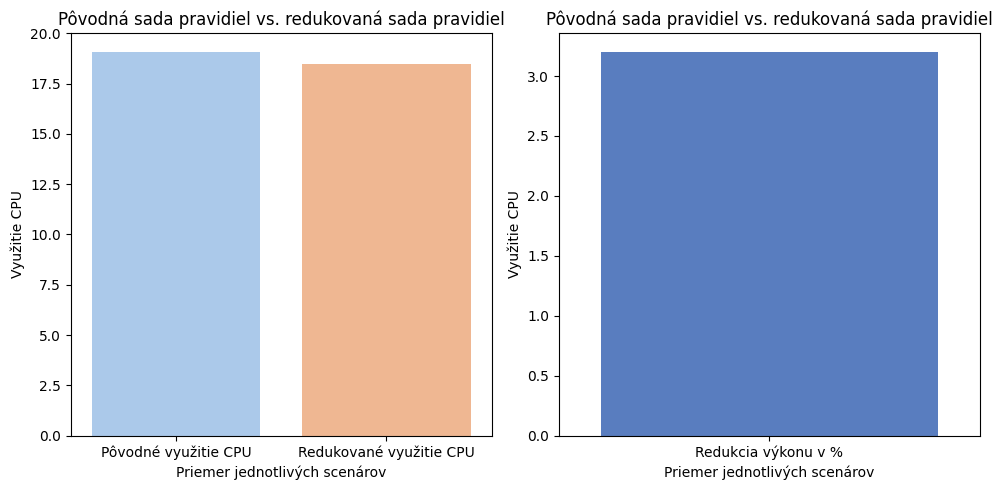

Redukcia vo využití CPU (absolútna), Priemer celkovo: 0.610%
Redukcia vo využití CPU (relatívna), Priemer celkovo: 3.200%


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

baseline =  sum(CPU_original) / len(CPU_original)
reduced = sum(CPU_reduced) / len(CPU_reduced) 

# Calculate absolute and percentual reduction
absolute_reduction = baseline - reduced
percentual_reduction = (absolute_reduction / baseline) * 100

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the baseline and reduced values
sns.barplot(x=["Pôvodné využitie CPU", "Redukované využitie CPU"], y=[baseline, reduced], ax=ax[0], palette="pastel")
ax[0].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[0].set_ylabel("Využitie CPU")
ax[0].set_xlabel("Priemer jednotlivých scenárov")

# Plot the percentual reduction
sns.barplot(x=["Redukcia výkonu v %"], y=[percentual_reduction], ax=ax[1], palette="muted")
ax[1].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[1].set_ylabel("Využitie CPU")
ax[1].set_xlabel("Priemer jednotlivých scenárov")

# Show the plots
plt.tight_layout()
plt.show()

# Display the calculated values
print("Redukcia vo využití CPU (absolútna), Priemer celkovo: {:.3f}%".format(absolute_reduction))
print("Redukcia vo využití CPU (relatívna), Priemer celkovo: {:.3f}%".format(percentual_reduction))


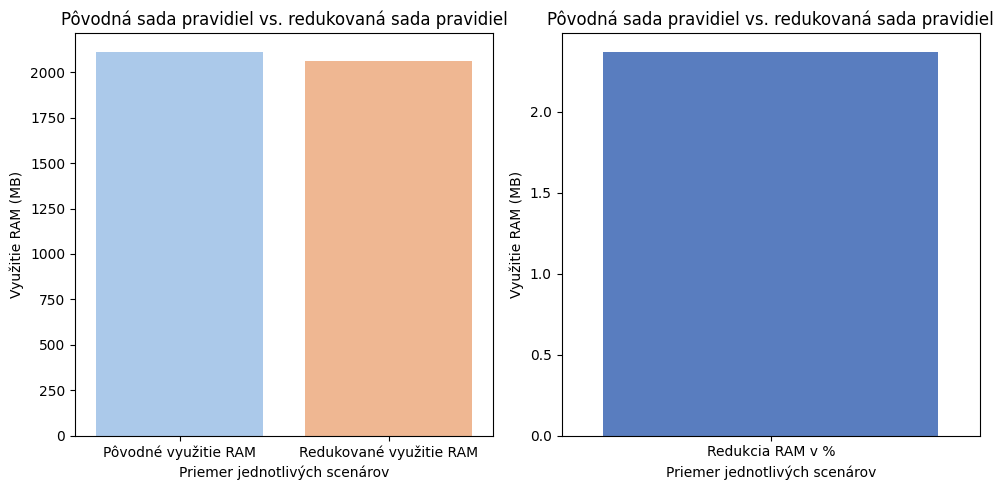

Redukcia vo využití RAM (absolútna), Priemer celkovo: 50.000 MB
Redukcia vo využití RAM (relatívna), Priemer celkovo: 2.369%


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Example data
baseline = RAM_original
reduced = RAM_reduced

# Calculate absolute and percentual reduction
absolute_reduction = baseline - reduced
percentual_reduction = (absolute_reduction / baseline) * 100

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the baseline and reduced values
sns.barplot(x=["Pôvodné využitie RAM", "Redukované využitie RAM"], y=[baseline, reduced], ax=ax[0], palette="pastel")
ax[0].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[0].set_ylabel("Využitie RAM (MB)")
ax[0].set_xlabel("Priemer jednotlivých scenárov")

# Plot the percentual reduction
sns.barplot(x=["Redukcia RAM v %"], y=[percentual_reduction], ax=ax[1], palette="muted")
ax[1].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[1].set_ylabel("Využitie RAM (MB)")
ax[1].set_xlabel("Priemer jednotlivých scenárov")

# Show the plots
plt.tight_layout()
plt.show()

# Display the calculated values
print("Redukcia vo využití RAM (absolútna), Priemer celkovo: {:.3f} MB".format(absolute_reduction))
print("Redukcia vo využití RAM (relatívna), Priemer celkovo: {:.3f}%".format(percentual_reduction))


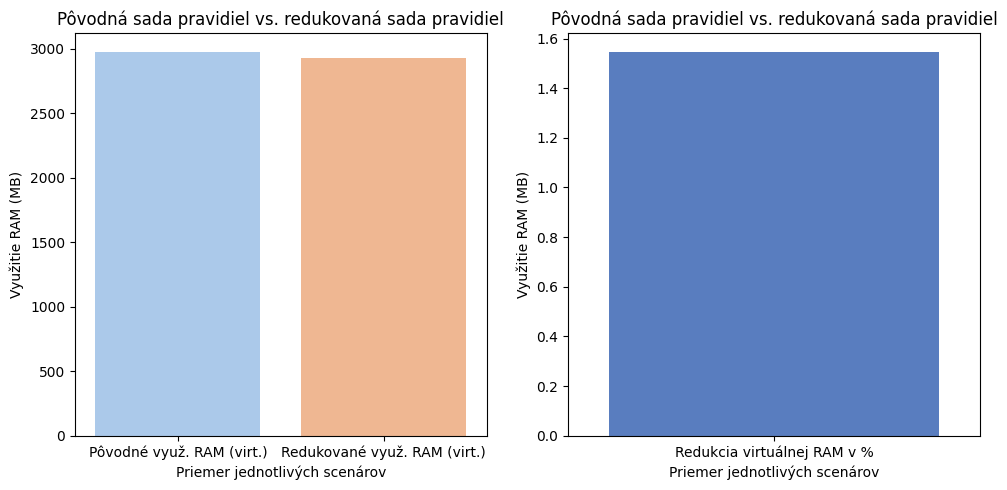

Redukcia vo využití virtuálnej RAM (absolútna), Priemer celkovo: 46.000 MB
Redukcia vo využití virtuálnej RAM (relatívna), Priemer celkovo: 1.546%


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Example data
baseline = RAM_Virtual_original
reduced = RAM_Virtual_reduced

# Calculate absolute and percentual reduction
absolute_reduction = baseline - reduced
percentual_reduction = (absolute_reduction / baseline) * 100

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the baseline and reduced values
sns.barplot(x=["Pôvodné využ. RAM (virt.)", "Redukované využ. RAM (virt.)"], y=[baseline, reduced], ax=ax[0], palette="pastel")
ax[0].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[0].set_ylabel("Využitie RAM (MB)")
ax[0].set_xlabel("Priemer jednotlivých scenárov")

# Plot the percentual reduction
sns.barplot(x=["Redukcia virtuálnej RAM v %"], y=[percentual_reduction], ax=ax[1], palette="muted")
ax[1].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[1].set_ylabel("Využitie RAM (MB)")
ax[1].set_xlabel("Priemer jednotlivých scenárov")

# Show the plots
plt.tight_layout()
plt.show()

# Display the calculated values
print("Redukcia vo využití virtuálnej RAM (absolútna), Priemer celkovo: {:.3f} MB".format(absolute_reduction))
print("Redukcia vo využití virtuálnej RAM (relatívna), Priemer celkovo: {:.3f}%".format(percentual_reduction))


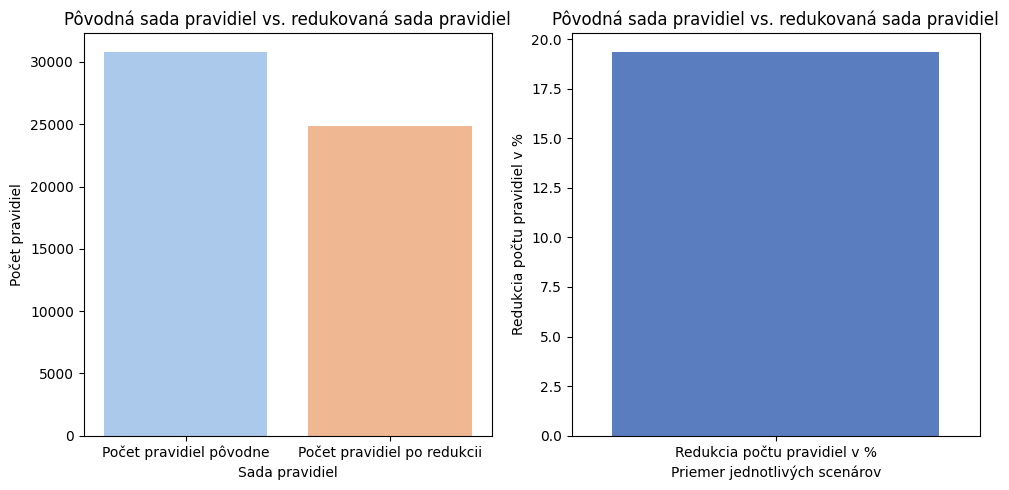

Redukcia v počte aplikovaných detekčných pravidiel (absolútna): 5957
Redukcia v počte aplikovaných detekčných pravidiel (relatívna), Celkovo: 19.345 %


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Example data
baseline = rules_original
reduced = rules_reduced

# Calculate absolute and percentual reduction
absolute_reduction = baseline - reduced
percentual_reduction = (absolute_reduction / baseline) * 100

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the baseline and reduced values
sns.barplot(x=["Počet pravidiel pôvodne", "Počet pravidiel po redukcii"], y=[baseline, reduced], ax=ax[0], palette="pastel")
ax[0].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[0].set_ylabel("Počet pravidiel")
ax[0].set_xlabel("Sada pravidiel")

# Plot the percentual reduction
sns.barplot(x=["Redukcia počtu pravidiel v %"], y=[percentual_reduction], ax=ax[1], palette="muted")
ax[1].set_title("Pôvodná sada pravidiel vs. redukovaná sada pravidiel")
ax[1].set_ylabel("Redukcia počtu pravidiel v %")
ax[1].set_xlabel("Priemer jednotlivých scenárov")

# Show the plots
plt.tight_layout()
plt.show()

# Display the calculated values
print("Redukcia v počte aplikovaných detekčných pravidiel (absolútna): {:.0f}".format(absolute_reduction))
print("Redukcia v počte aplikovaných detekčných pravidiel (relatívna): {:.3f} %".format(percentual_reduction))


### Zhrnutie

Ako možno vyplvíva z predchádzajúcich ale aj nasledujúcich grafov, možno konštatovať, že vďaka redukcii použitej sady pravidiel sa nám podarilo zredukovať výpočtové požiadavky systému IDS. Pričom ako sme ukázali pri experimentoch zameraných na vyhodnocovanie vygenerovaných upozornení analytikmi nedošlo k zníženiu efektívnosti systému IDS resp. k strate v generovaní z bezpečnostného hľadiska relevantných upozornení. 

Ako vyplýva z tejto dátovej analýzy, redukciou aplikovanej sady pravidiel sme dokázali zredukovať priemerný výkon CPU pri vykonaných testovacích experimentoch  o 0,6%. Ak by sme považovali pôvodné využitie CPU ako základné využitie CPU možno hovoriť o dosiahnutej relatívnej úspore vo využití CPU na úrovni 3,2%. 

Reduckia sady pravidiel o takmer 6000 pravidiel prispela aj k redukcii vo využití operačnej pamäte RAM o takmer 50 Mb. 

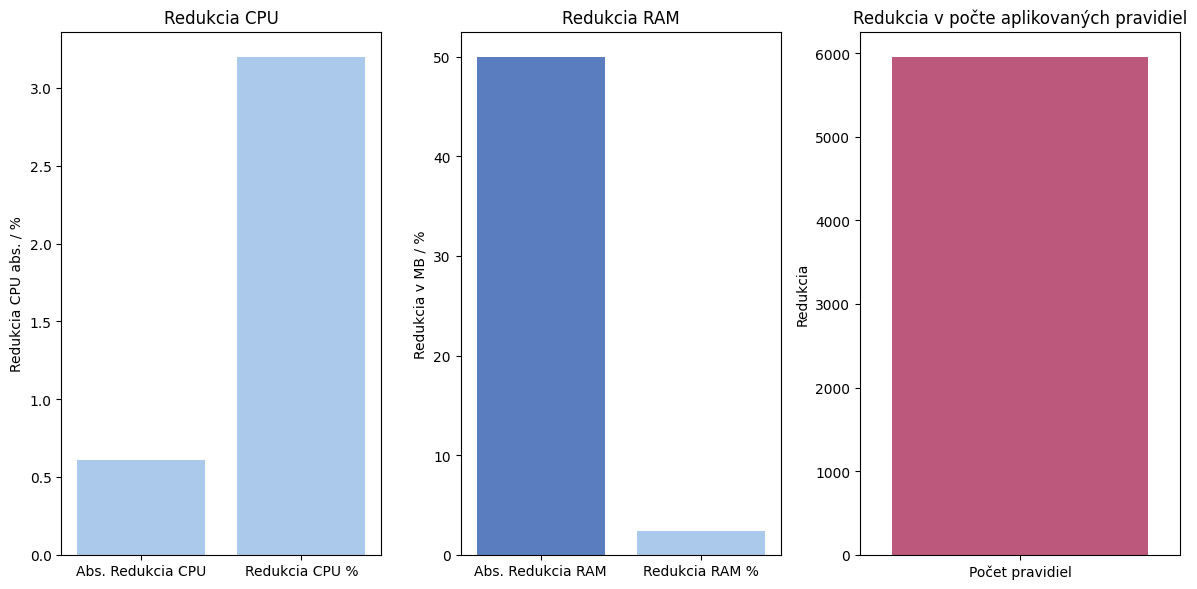

Redukcia vo využití CPU (absolútna): 0.610
Redukcia vo využití CPU (relatívna): 3.200 %


Redukcia vo využití virtuálnej RAM (absolútna): 50.000
Redukcia vo využití virtuálnej RAM (relatívna): 2.369 %


Redukcia v počte aplikovaných detekčných pravidiel (absolútna): 5957
Redukcia v počte aplikovaných detekčných pravidiel (relatívna): 19.345 %




In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

cpu_original =  sum(CPU_original) / len(CPU_original)
cpu_reduced =  sum(CPU_reduced) / len(CPU_reduced)

ram_original = 2111
ram_reduced = 2061

rules_original = 30793
rules_reduced = 24836

# Calculate absolute reductions
cpu_reduction = cpu_original - cpu_reduced
ram_reduction = ram_original - ram_reduced
rules_reduction = rules_original - rules_reduced

cpu_percentual_reduction = ((cpu_original - cpu_reduced) / cpu_original) * 100
ram_percentual_reduction = ((ram_original - ram_reduced) / ram_original) * 100
rules_percentual_reduction = ((rules_original - rules_reduced) / rules_original) * 100


# Create a figure with three separate axes
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot the reduction in CPU
sns.barplot(x=["Abs. Redukcia CPU"], y=[cpu_reduction], ax=axes[0], palette="pastel")
axes[0].set_ylabel("Reduction")

sns.barplot(x=["Redukcia CPU %"], y=[cpu_percentual_reduction], ax=axes[0], palette="pastel")
axes[0].set_title("Redukcia CPU")
axes[0].set_ylabel("Redukcia CPU abs. / %")


# Plot the reduction in RAM
sns.barplot(x=["Abs. Redukcia RAM"], y=[ram_reduction], ax=axes[1], palette="muted")
axes[1].set_title("RAM Reduction")

sns.barplot(x=["Redukcia RAM %"], y=[ram_percentual_reduction], ax=axes[1], palette="pastel")
axes[1].set_title("Redukcia RAM")
axes[1].set_ylabel("Redukcia v MB / %")

# Plot the reduction in Rules
sns.barplot(x=["Počet pravidiel"], y=[rules_reduction], ax=axes[2], palette="plasma")
axes[2].set_title("Redukcia v počte aplikovaných pravidiel")
axes[2].set_ylabel("Redukcia")


# Display the plots
plt.tight_layout()
plt.show()

# Output calculated reductions
print("Redukcia vo využití CPU (absolútna): {:.3f}".format(cpu_reduction))
print("Redukcia vo využití CPU (relatívna): {:.3f} %\n\n".format(cpu_percentual_reduction))
print("Redukcia vo využití virtuálnej RAM (absolútna): {:.3f}".format(ram_reduction))
print("Redukcia vo využití virtuálnej RAM (relatívna): {:.3f} %\n\n".format(ram_percentual_reduction))
print("Redukcia v počte aplikovaných detekčných pravidiel (absolútna): {:.0f}".format(rules_reduction))
print("Redukcia v počte aplikovaných detekčných pravidiel (relatívna): {:.3f} %\n\n".format(rules_percentual_reduction))